### <font color = blue> Decision Tree Classification of Telecom Churn dataset </font>
##### Analysed by
#### <font color = green> Mustafa Kamal Shahadat

#### Import required libraries

In [30]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Load data
Dataset Source: https://github.com/SKawsar/machine_learning_with_python/blob/main/Churn.csv 
<br> Actual Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/SKawsar/machine_learning_with_python/main/Churn.csv')
display(df.head(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [32]:
# Looking data dimension
print(df.shape)

(3333, 21)


- <font color= green> There are 3333 rows and 21 columns in the dataset

In [33]:
# Observing data type of each fature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Data Preprocessing

In [34]:
# Checking unique values of 'Churn', 'Intl_Plan' and 'Vmail_Plan' features
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


In [35]:
# Dropping less important features like 'State', 'Area_Code' and 'Phone'
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

In [36]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in columns 'Churn', 'Intl_Plan', 'Vmail_Plan'.                                      
df['Churn'] = label_encoder.fit_transform (df['Churn'])
df['Intl_Plan'] = label_encoder.fit_transform (df['Intl_Plan'])
df['Vmail_Plan'] = label_encoder.fit_transform (df['Vmail_Plan']) 

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


<font color=green> **In this dataset Label Encoding is suitable because the categorical features are ordinal i.e 'yes' and 'no'**

In [37]:
# Checking data types once again to see tha change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int32  
 8   Intl_Plan       3333 non-null   int32  
 9   Vmail_Plan      3333 non-null   int32  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#### Data Transformation

In [38]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in df.columns:
    df[col] = scaler.fit_transform(df[[col]])

display(df.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
3075,0.743802,0.784314,0.299886,0.938411,0.383271,0.315,0.222222,0.0,0.0,1.0,0.369697,0.299799,0.464706,0.938531,0.450704,0.383742,0.15,0.314815
1535,0.404959,0.000000,0.633979,0.510861,0.576923,0.600,0.222222,0.0,0.0,0.0,0.618182,0.633970,0.523529,0.510838,0.338028,0.577406,0.40,0.600000
1181,0.272727,0.686275,0.699544,0.407479,0.674556,0.375,0.111111,0.0,0.0,1.0,0.539394,0.699531,0.600000,0.407635,0.725352,0.674836,0.30,0.375926
2546,0.367769,0.000000,0.450114,0.643387,0.502421,0.610,0.222222,0.0,0.0,0.0,0.436364,0.450034,0.547059,0.643481,0.373239,0.502690,0.25,0.609259
1332,0.388430,0.627451,0.704105,0.345340,0.546799,0.525,0.333333,0.0,0.0,1.0,0.660606,0.704058,0.535294,0.345519,0.401408,0.546922,0.20,0.525926
1496,0.330579,0.705882,0.330388,0.650536,0.623453,0.585,0.333333,0.0,0.0,1.0,0.727273,0.330315,0.558824,0.650599,0.401408,0.624029,0.30,0.585185
2092,0.276860,0.000000,0.625998,0.387957,0.490855,0.540,0.222222,0.0,0.0,0.0,0.587879,0.625922,0.847059,0.387900,0.478873,0.491333,0.20,0.540741
2689,0.322314,0.000000,0.507127,0.459995,0.539268,0.760,0.000000,0.0,0.0,0.0,0.503030,0.507042,0.494118,0.460045,0.767606,0.539749,0.40,0.759259
2014,0.355372,0.000000,0.525941,0.472917,0.430877,0.685,0.333333,0.0,0.0,0.0,0.490909,0.525989,0.605882,0.472986,0.443662,0.430962,0.15,0.685185
590,0.446281,0.000000,0.624002,0.824581,0.364174,0.565,0.222222,0.0,0.0,0.0,0.636364,0.623910,0.511765,0.824652,0.542254,0.364614,0.20,0.564815


In [39]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.552599,0.477870,0.511865,0.173651,0.144914,0.096910,0.276628,0.608701,0.512446,0.588908,0.552687,0.472590,0.478143,0.223972,0.511960
std,0.164554,0.268399,0.155266,0.139439,0.136024,0.139592,0.146166,0.352067,0.295879,0.447398,0.121631,0.155255,0.117192,0.139459,0.137807,0.136035,0.123061,0.139588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.458070,0.386767,0.425000,0.111111,0.000000,0.000000,0.000000,0.527273,0.409624,0.511765,0.458104,0.380282,0.387328,0.150000,0.425926
50%,0.413223,0.000000,0.511403,0.553753,0.478752,0.515000,0.111111,0.000000,0.000000,0.000000,0.612121,0.511402,0.588235,0.553866,0.471831,0.478781,0.200000,0.514815
75%,0.520661,0.392157,0.616876,0.646962,0.570468,0.605000,0.222222,0.000000,0.000000,1.000000,0.690909,0.616868,0.670588,0.647040,0.563380,0.570831,0.300000,0.605556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<font color = 'green'> Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models.

#### Target variable 

In [40]:
df['Churn'].value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

#### Feature and target variable separation

In [41]:
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train test separation

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2333, 17) (1000, 17) (2333, 1) (1000, 1)


#### Stratification

In [43]:
class_0_train = y_train['Churn'].value_counts().values[0]
class_1_train = y_train['Churn'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.16942355889724312


In [44]:
class_0_test = y_test['Churn'].value_counts().values[0]
class_1_test = y_test['Churn'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.1695906432748538


#### Training: Decision Tree classifier without grid search

In [45]:
# model = LogisticRegression()
model_DT = DecisionTreeClassifier()
# model = RandomForestClassifier()
model_DT = model_DT.fit(X_train, y_train)

#### Tree Diagram

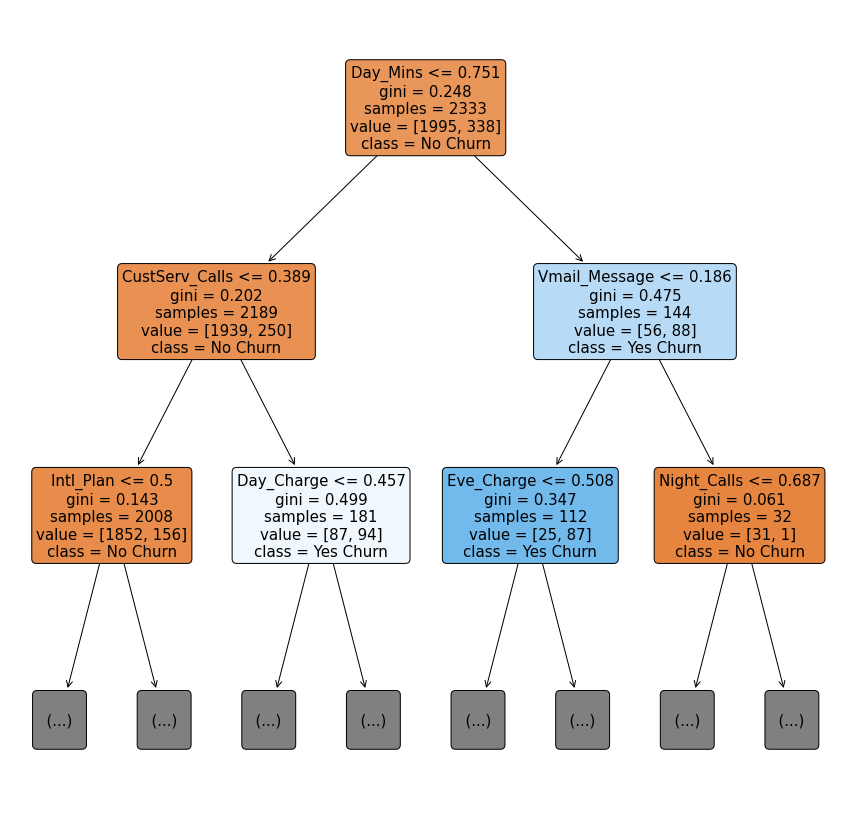

In [46]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No Churn", "Yes Churn"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

#### Model Performance Evaluation

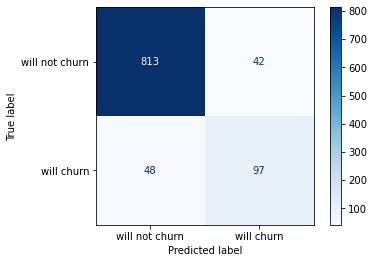

In [47]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test['Churn'], 
                      display_labels=["will not churn", "will churn"],
                      cmap='Blues')
plt.show()

In [48]:
TPR = np.round(97/(97+48), 2)
FPR = np.round(42/(42+813), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.67
False Positive Rate =  0.05


In [49]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.91
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       855
         1.0       0.70      0.67      0.68       145

    accuracy                           0.91      1000
   macro avg       0.82      0.81      0.82      1000
weighted avg       0.91      0.91      0.91      1000



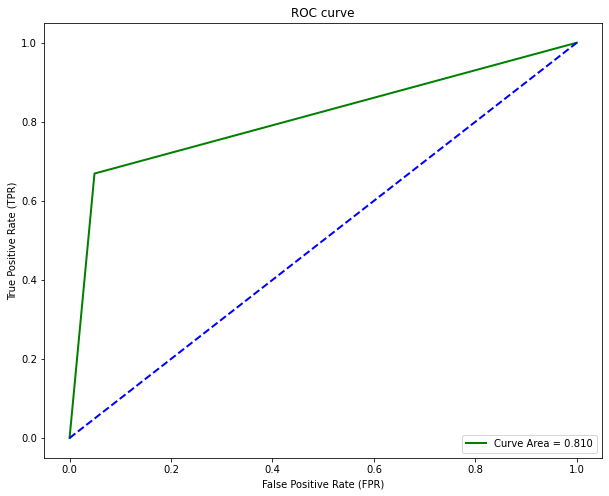

In [50]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

#### Grid Search and cross-validation

In [51]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7]}

model_DT = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model_DT,
                           param_grid=parameters,
                           scoring="accuracy",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [52]:
y_pred_DT = np.round(grid_result.predict(X_test), 2)

#### Best hyperparameters in the grid search

In [53]:
grid_result.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [54]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,entropy,6,0.944325,0.925054,0.946467,0.952790,0.920601,0.937847,0.012654,1
4,gini,7,0.940043,0.925054,0.929336,0.954936,0.937768,0.937427,0.010316,2
2,gini,5,0.937901,0.914347,0.946467,0.944206,0.942060,0.936996,0.011672,3
9,entropy,7,0.935760,0.927195,0.946467,0.929185,0.942060,0.936133,0.007352,4
3,gini,6,0.940043,0.925054,0.940043,0.944206,0.924893,0.934848,0.008205,5
7,entropy,5,0.940043,0.912206,0.940043,0.935622,0.937768,0.933136,0.010594,6
1,gini,4,0.907923,0.914347,0.935760,0.916309,0.918455,0.918559,0.009293,7
6,entropy,4,0.907923,0.914347,0.929336,0.916309,0.916309,0.916845,0.006963,8
0,gini,3,0.886510,0.905782,0.920771,0.892704,0.899142,0.900982,0.011798,9
5,entropy,3,0.886510,0.905782,0.907923,0.892704,0.873391,0.893262,0.012747,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


#### Model performance evaluation with the best found model in grid search and cross-validation

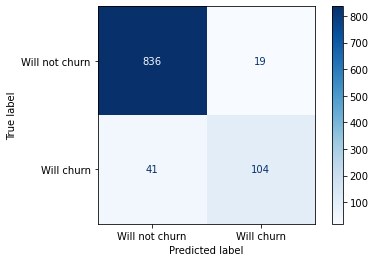

In [55]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not churn", "Will churn"],
                      cmap='Blues')
plt.show()

In [56]:
TPR = np.round(104/(104+41), 2)
FPR = np.round(19/(19+836), 2)
print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.72
False Positive Rate =  0.02


In [57]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred_DT)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

confusion_matrix: 
 [[836  19]
 [ 41 104]]
Accuracy:  0.94
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       855
         1.0       0.85      0.72      0.78       145

    accuracy                           0.94      1000
   macro avg       0.90      0.85      0.87      1000
weighted avg       0.94      0.94      0.94      1000



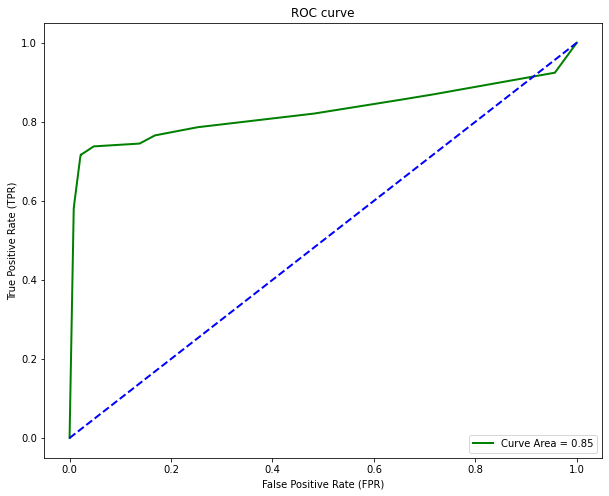

In [58]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred_DT), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

- Overall model performed pretty good. Model accuaracy was about 94%, and most importantly average model precision, Recall and f1 score were 0.90, 0.85 and 0.87%, respectively, those are much higher. Beside, from ROC curve True Positive Rate was greater (0.72) than False Positive Rate (0.02). So, we can say that decisition tree classifier performed fairly good in deciding whether customers will churn or not in the 'Churn' data set.
- At the data preprocessing stage, we transformed data which did not affect model performance since in tree based algorithms data transformation is not mandatory. However, grid search improved model performance than without grid search.  